In [2]:
from analysis_utils import *
import numpy as np
%load_ext autoreload
import pandas as pd
cols = pd.read_excel('grPredicted.xlsx',header=None,skiprows=[0])
gr=np.array(cols[0])
phi_rib=cols[1]
phi_tern=cols[2]
phi_crowder=cols[3]
phi_tot=cols[4]
phi_max_high=cols[5]
phi_max_low=cols[6]

cols = pd.read_excel('grSpread.xlsx',header=None,skiprows=[0])
gr_spread=np.array(cols[0])
gr_spread = cols[0]
phi_max_spread=cols[4]
gr_spread[19:23]

19     4.0
20     6.0
21     8.0
22    10.0
Name: 0, dtype: float64

In [4]:
phi_max_spread

0     0.135000
1     0.224000
2     0.299000
3     0.359000
4     0.392000
5     0.422677
6     0.449789
7     0.475172
8     0.569845
9     0.661266
10    0.752182
11    0.482131
12    0.593105
13    0.702113
14    0.811167
15    0.484359
16    0.598310
17    0.709904
18    0.820947
19    0.497044
20    0.618752
21    0.732404
22    0.843508
23    0.463447
24    0.539959
25    0.608387
26    0.672979
27    0.471693
28    0.558215
29    0.640843
30    0.722690
31    0.473828
32    0.562804
33    0.647173
34    0.730024
35    0.486606
36    0.583862
37    0.671134
38    0.755030
39    0.453009
40    0.505069
41    0.547117
42    0.584501
43    0.467922
44    0.530716
45    0.577408
46    0.616842
47    0.478360
48    0.565606
49    0.638678
50    0.705320
51    0.531863
52    0.679580
53    0.816011
54    0.946850
Name: 4, dtype: float64

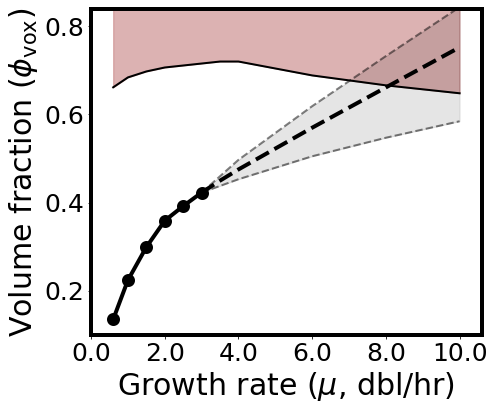

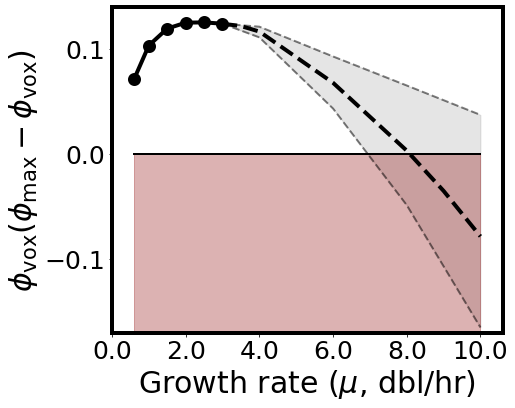

In [281]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(7,6))

ax.plot(gr[0:6], phi_tot[0:6],zorder=1,linewidth=4,color='black')
ax.errorbar(gr[0:6], phi_tot[0:6],zorder=1,color='black',marker='o',markersize=8,markeredgewidth=5,linewidth=0,elinewidth=2)
ax.plot(gr[5:], phi_tot[5:],zorder=1,linewidth=4,color='black',linestyle='dashed')
#ax.errorbar(gr[4:-1], phi_tot[0:5],zorder=1,color='black',marker='o',markersize=12,markeredgewidth=5,linewidth=0,elinewidth=2)

#ax.plot(gr, phi_max_high,zorder=1,linewidth=2,color='black')
ax.plot(gr, phi_max_low,zorder=1,linewidth=2,color='black')
ax.fill_between(gr, phi_max_low, [0.9]*12, color='darkred',alpha=0.3)

ax.plot(np.append(3.0,np.array(gr_spread[39:43])),np.append(phi_tot[5],np.array(phi_max_spread[39:43])),color='black',linewidth=2,alpha=0.5,linestyle='dashed')
ax.plot(np.append(3.0,np.array(gr_spread[19:23])),np.append(phi_tot[5],np.array(phi_max_spread[19:23])),color='black',linewidth=2,alpha=0.5,linestyle='dashed')
ax.fill_between(np.append(3.0,np.array(gr_spread[19:23])),np.append(phi_tot[5],np.array(phi_max_spread[39:43])),np.append(phi_tot[5],np.array(phi_max_spread[19:23])),color='black',alpha=0.1)
ax.set_ylabel('Volume fraction $(\phi_{\mathrm{vox}})$',size=30,color='black')
ax.set_ylim(0.1,0.84)


fig,ax1=plt.subplots(1,1,figsize=(7,6))
#ax1.plot(gr,phi_max_high-phi_tot)
ax1.errorbar(gr[0:6],phi_tot[0:6]*(phi_max_low[0:6]-phi_tot[0:6]),zorder=1,color='black',marker='o',markersize=8,markeredgewidth=5,linewidth=0,elinewidth=2)
ax1.plot(gr[0:6],phi_tot[0:6]*(phi_max_low[0:6]-phi_tot[0:6]),linewidth=4,color='black')
ax1.plot(gr[5:],phi_tot[5:]*(phi_max_low[5:]-phi_tot[5:]),linewidth=4,color='black',linestyle='dashed')

#ax1.plot(np.append(3.0,np.array(gr_spread[39:43])),np.take(phi_tot,[5,7,8,9,11])*(np.take(phi_max_low,[5,7,8,9,11])-np.append(phi_tot[5],np.array(phi_max_spread[39:43]))),color='black',linewidth=2,alpha=0.5,linestyle='dashed')
grs = np.append(3.0,np.array(gr_spread[19:23]))
phi_tot_additional_high = np.append(phi_tot[5],np.array(phi_max_spread[19:23]))
phi_tot_additional_low = np.append(phi_tot[5],np.array(phi_max_spread[39:43]))
phi_maxs = np.take(phi_max_low,[5,7,8,9,11])
ax1.plot(grs,phi_tot_additional_high*(phi_maxs-phi_tot_additional_high),color='black',linewidth=2,alpha=0.5,linestyle='dashed')
ax1.plot(grs,phi_tot_additional_low*(phi_maxs-phi_tot_additional_low),color='black',linewidth=2,alpha=0.5,linestyle='dashed')
ax1.fill_between(grs,phi_tot_additional_low*(phi_maxs-phi_tot_additional_low),phi_tot_additional_high*(phi_maxs-phi_tot_additional_high),color='black',alpha=0.1)

#ax1.errorbar(gr[0:6],phi_tot[0:6]*(phi_max_high[0:6]-phi_tot[0:6]),zorder=1,color='black',marker='o',markersize=8,markeredgewidth=5,linewidth=0,elinewidth=2)
#ax1.plot(gr[0:6],phi_tot[0:6]*(phi_max_high[0:6]-phi_tot[0:6]),linewidth=4,color='black')
#ax1.plot(gr[5:],phi_tot[5:]*(phi_max_high[5:]-phi_tot[5:]),linewidth=4,color='black',linestyle='dashed')

ax1.set_ylabel('$\phi_{\mathrm{vox}}(\phi_{\mathrm{max}}-\phi_{\mathrm{vox}})$',size=30,color='black')
ax1.fill_between(gr, [0]*12, [-0.17]*12, color='darkred',alpha=0.3)
ax1.set_ylim(-0.17,0.14)
ax1.plot(gr,[0]*12,color='black',linewidth=2)

for _,ax in enumerate([ax,ax1]):
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.set_xlabel('Growth rate ($µ$, dbl/hr)',size=30)
    ax.set_xlim(0,10.6)
    ax.set_xticks([0.0,2.0,4.0,6.0,8.0,10.0])
    ax.set_xticklabels(['0.0','2.0','4.0','6.0','8.0','10.0'])

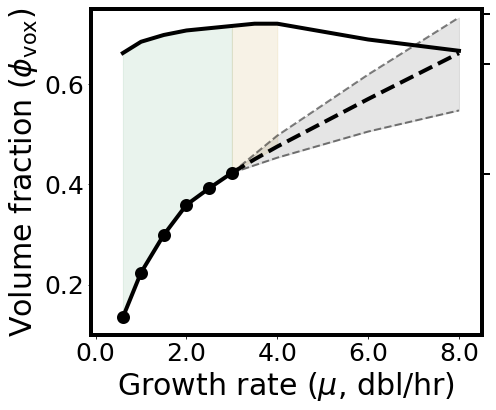

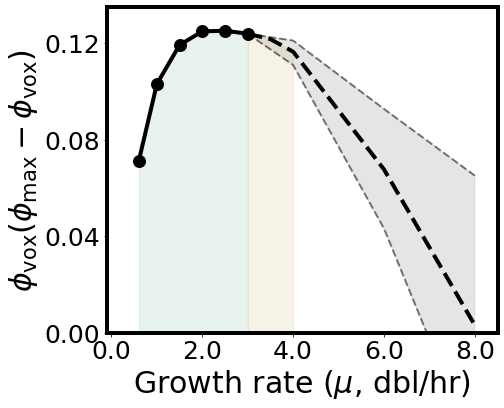

In [90]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(7,6))

ax.plot(gr[0:6], phi_tot[0:6],zorder=1,linewidth=4,color='black')
ax.errorbar(gr[0:6], phi_tot[0:6],zorder=1,color='black',marker='o',markersize=8,markeredgewidth=5,linewidth=0,elinewidth=2)
ax.plot(gr[5:10], phi_tot[5:10],zorder=1,linewidth=4,color='black',linestyle='dashed')
#ax.errorbar(gr[4:-1], phi_tot[0:5],zorder=1,color='black',marker='o',markersize=12,markeredgewidth=5,linewidth=0,elinewidth=2)

#ax.plot(gr, phi_max_high,zorder=1,linewidth=2,color='black')
ax.plot(gr[0:-2], phi_max_low[0:-2],zorder=1,linewidth=4,color='black')
#ax.fill_between(gr, phi_max_low, [0.9]*12, color='darkred',alpha=0.3)

ax.plot(np.append(3.0,np.array(gr_spread[39:42])),np.append(phi_tot[5],np.array(phi_max_spread[39:42])),color='black',linewidth=2,alpha=0.5,linestyle='dashed')
ax.plot(np.append(3.0,np.array(gr_spread[19:22])),np.append(phi_tot[5],np.array(phi_max_spread[19:22])),color='black',linewidth=2,alpha=0.5,linestyle='dashed')
ax.fill_between(np.append(3.0,np.array(gr_spread[19:22])),np.append(phi_tot[5],np.array(phi_max_spread[39:42])),np.append(phi_tot[5],np.array(phi_max_spread[19:22])),color='black',alpha=0.1)
ax.set_ylabel('Volume fraction $(\phi_{\mathrm{vox}})$',size=30,color='black')
ax.set_ylim(0.1,0.75)

ax.fill_between(gr[0:6],phi_tot[0:6], phi_max_low[0:6],color='seagreen',alpha=0.1)
ax.fill_between(gr[5:8],phi_tot[5:8], phi_max_low[5:8],color='darkgoldenrod',alpha=0.1)


fig,ax1=plt.subplots(1,1,figsize=(7,6))
#ax1.plot(gr,phi_max_high-phi_tot)
ax1.errorbar(gr[0:6],phi_tot[0:6]*(phi_max_low[0:6]-phi_tot[0:6]),zorder=1,color='black',marker='o',markersize=8,markeredgewidth=5,linewidth=0,elinewidth=2)
ax1.plot(gr[0:6],phi_tot[0:6]*(phi_max_low[0:6]-phi_tot[0:6]),linewidth=4,color='black')
ax1.plot(gr[5:10],phi_tot[5:10]*(phi_max_low[5:10]-phi_tot[5:10]),linewidth=4,color='black',linestyle='dashed')

#ax1.plot(np.append(3.0,np.array(gr_spread[39:43])),np.take(phi_tot,[5,7,8,9,11])*(np.take(phi_max_low,[5,7,8,9,11])-np.append(phi_tot[5],np.array(phi_max_spread[39:43]))),color='black',linewidth=2,alpha=0.5,linestyle='dashed')
grs = np.append(3.0,np.array(gr_spread[19:22]))
phi_tot_additional_high = np.append(phi_tot[5],np.array(phi_max_spread[19:22]))
phi_tot_additional_low = np.append(phi_tot[5],np.array(phi_max_spread[39:42]))
phi_maxs = np.take(phi_max_low,[5,7,8,9])
ax1.plot(grs,phi_tot_additional_high*(phi_maxs-phi_tot_additional_high),color='black',linewidth=2,alpha=0.5,linestyle='dashed')
ax1.plot(grs,phi_tot_additional_low*(phi_maxs-phi_tot_additional_low),color='black',linewidth=2,alpha=0.5,linestyle='dashed')
ax1.fill_between(grs,phi_tot_additional_low*(phi_maxs-phi_tot_additional_low),phi_tot_additional_high*(phi_maxs-phi_tot_additional_high),color='black',alpha=0.1)

ax1.fill_between(gr[0:6],[0]*6, phi_tot[0:6]*(phi_max_low[0:6]-phi_tot[0:6]),color='seagreen',alpha=0.1)
ax1.fill_between(gr[5:8],[0]*3, phi_tot[5:8]*(phi_max_low[5:8]-phi_tot[5:8]),color='darkgoldenrod',alpha=0.1)

#ax1.errorbar(gr[0:6],phi_tot[0:6]*(phi_max_high[0:6]-phi_tot[0:6]),zorder=1,color='black',marker='o',markersize=8,markeredgewidth=5,linewidth=0,elinewidth=2)
#ax1.plot(gr[0:6],phi_tot[0:6]*(phi_max_high[0:6]-phi_tot[0:6]),linewidth=4,color='black')
#ax1.plot(gr[5:],phi_tot[5:]*(phi_max_high[5:]-phi_tot[5:]),linewidth=4,color='black',linestyle='dashed')

ax1.set_ylabel('$\phi_{\mathrm{vox}}(\phi_{\mathrm{max}}-\phi_{\mathrm{vox}})$',size=30,color='black')
#ax1.fill_between(gr, [0]*12, [-0.17]*12, color='darkred',alpha=0.3)
ax1.set_ylim(0,0.135)
ax1.plot(gr,[0]*12,color='black',linewidth=4)
ax1.set_yticks([0,0.04,0.08,0.12])
ax1.set_yticklabels(['0.00','0.04','0.08','0.12'])

ax2 = ax.twinx()
ax2.set_ylim(0.1,0.75)
ax2.set_yticks([0.42,0.64,0.74])
ax2.set_yticklabels(['','',''])
ax2.tick_params(which='major',length=8,direction='out')
ax2.yaxis.set_tick_params(width=2)

for _,ax in enumerate([ax,ax1,ax2]):
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.set_xlabel('Growth rate ($µ$, dbl/hr)',size=30)
    ax.set_xlim(-0.1,8.5)
    ax.set_xticks([0.0,2.0,4.0,6.0,8.0])
    ax.set_xticklabels(['0.0','2.0','4.0','6.0','8.0'])

In [252]:
grs = np.append(3.0,np.array(gr_spread[19:23]))
phi_tot_additional = np.append(phi_tot[5],np.array(phi_max_spread[19:23]))
phi_maxs = np.take(phi_max_high,[5,7,8,9,11])
print(grs)
print(phi_tot_additional)
print(phi_maxs)

[ 3.  4.  6.  8. 10.]
[0.42267669 0.49704368 0.6187521  0.73240393 0.84350802]
5     0.795
7     0.800
8     0.765
9     0.740
11    0.720
Name: 5, dtype: float64


In [256]:
phi_max_high

0     0.735
1     0.760
2     0.775
3     0.785
4     0.790
5     0.795
6     0.800
7     0.800
8     0.765
9     0.740
10    0.730
11    0.720
Name: 5, dtype: float64

In [282]:
from analysis_utils import *
%load_ext autoreload
%autoreload
path = '/Users/Akshay/Documents/TranslationDynamics/data/'
data = '191010_1846' #'200708_1100'

gr=[0.6,1.0,1.5,2.0,2.5,3.0] ## doubling rate
vox =[0.101*1/0.0059,0.0929*1/0.0059,0.0842*1/0.0059,0.0774*1/0.0059,0.072*1/0.0059,0.0677*1/0.0059] 
expnum = 100

max_dist = []
for i in range(len(vox)):
     max_dist.append(vox[i]/2)
print('max_dist, ', max_dist)

dist = {}
distancesAvg = []
distancesStd = []
for i in range(0,len(gr)):
    print('gr:', gr[i])
    dist[gr[i]] = calcPairDistances(path+data+'/',expnum*i,expnum*(i+1),3,11, max_dist[i]) #experiment number hardcoded & species hardcoded (3,11) for tRNA-rib (closest ribosome to tRNA, averaged across all tRNA); 11-11 for rib-rib; 4-4 crowder-corwder
    distancesAvg.append(np.average(dist[gr[i]]))
    distancesStd.append(np.std(dist[gr[i]])/np.sqrt((len(dist[gr[i]]))-1))
distancesAvg = np.array(distancesAvg)
distancesStd=np.array(distancesStd)
print('Average distances: ', distancesAvg)
print('Standard deviations: ', distancesStd)
print((distancesAvg-(3.2))*5.9)
ribosome_crowder = [ 0.06220219, -0.02384976, -0.09152914, -0.18000547, -0.19814492, -0.20797733]
crowder_ribosome = [19.26130005, 10.88150617,  7.93337979,  6.3722814,   5.66859135,  5.28247547]

tRNA_crowder = 1.35481843
crowder_crowder = 0.6

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
max_dist,  [8.559322033898306, 7.872881355932203, 7.135593220338983, 6.559322033898305, 6.101694915254237, 5.737288135593221]
gr: 0.6
gr: 1.0
gr: 1.5
gr: 2.0
gr: 2.5
gr: 3.0
Error on expt  561
Error on expt  563
Error on expt  566
Error on expt  567
Error on expt  568
Error on expt  569
Error on expt  570
Error on expt  573
Error on expt  575
Error on expt  577
Error on expt  578
Error on expt  580
Error on expt  583
Error on expt  584
Error on expt  585
Error on expt  587
Error on expt  589
Error on expt  592
Error on expt  594
Error on expt  595
Error on expt  596
Error on expt  597
Error on expt  598
Average distances:  [5.92918604 4.617987   4.12972715 3.90733394 3.78700547 3.72174977]
Standard deviations:  [0.02423838 0.01553814 0.0120691  0.01003043 0.00905102 0.00945468]
[16.10219764  8.3661233   5.48539021  4.17327025  3.4633323   3.07832364]


In [1]:
from analysis_utils import *
%load_ext autoreload
%autoreload
path = '/Users/Akshay/Documents/TranslationDynamics/data/'
data = '210208_1619' #'200708_1100'

gr=[0.6,1.0,1.5,2.0,2.5,3.0,4.0,5.0,6.0,7.0] ## doubling rate
vox =[0.101*1/0.0059,0.0929*1/0.0059,0.0842*1/0.0059,0.0774*1/0.0059,0.072*1/0.0059,0.0677*1/0.0059,0.0612*1/0.0059,0.0565*1/0.0059,0.0529*1/0.0059,0.0501*1/0.0059] 
expnum = 100

max_dist = []
for i in range(len(vox)):
     max_dist.append(vox[i]/2)
print('max_dist, ', max_dist)

dist = {}
distancesAvg = []
distancesStd = []
for i in range(0,len(gr)):
    print('gr:', gr[i])
    dist[gr[i]] = calcPairDistances(path+data+'/',expnum*i,expnum*(i+1),3,11, max_dist[i]) #experiment number hardcoded & species hardcoded (3,11) for tRNA-rib (closest ribosome to tRNA, averaged across all tRNA); 11-11 for rib-rib; 4-4 crowder-corwder
    distancesAvg.append(np.average(dist[gr[i]]))
    distancesStd.append(np.std(dist[gr[i]])/np.sqrt((len(dist[gr[i]]))-1))
distancesAvg = np.array(distancesAvg)
distancesStd=np.array(distancesStd)
print('Average distances: ', distancesAvg)
print('Standard deviations: ', distancesStd)
print((distancesAvg-(3.2))*5.9)
ribosome_crowder = [ 0.06220219, -0.02384976, -0.09152914, -0.18000547, -0.19814492, -0.20797733]
crowder_ribosome = [19.26130005, 10.88150617,  7.93337979,  6.3722814,   5.66859135,  5.28247547]

tRNA_crowder = 1.35481843
crowder_crowder = 0.6

max_dist,  [8.559322033898306, 7.872881355932203, 7.135593220338983, 6.559322033898305, 6.101694915254237, 5.737288135593221, 5.186440677966101, 4.788135593220339, 4.483050847457627, 4.245762711864407]
gr: 0.6
gr: 1.0
gr: 1.5
gr: 2.0
gr: 2.5
gr: 3.0
gr: 4.0
gr: 5.0
gr: 6.0
gr: 7.0
Error on expt  999
Average distances:  [5.92918604 4.617987   4.12972715 3.90733394 3.78700547 3.72348396
 3.71088555 3.50488844 3.49399192 3.36633281]
Standard deviations:  [0.02423838 0.01553814 0.0120691  0.01003043 0.00905102 0.00827989
 0.00830245 0.00619851 0.00615255 0.00519806]
[16.10219764  8.3661233   5.48539021  4.17327025  3.4633323   3.08855538
  3.01422473  1.79884177  1.73455231  0.98136358]


In [3]:
from analysis_utils import *
%load_ext autoreload
%autoreload
path = '/Users/Akshay/Documents/TranslationDynamics/data/'
data = '210208_1754' #'200708_1100'

gr=[0.6,1.0,1.5,2.0,2.5,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0] ## doubling rate
vox =[0.101*1/0.0059,0.0929*1/0.0059,0.0842*1/0.0059,0.0774*1/0.0059,0.072*1/0.0059,0.0677*1/0.0059,0.0612*1/0.0059,0.0565*1/0.0059,0.0529*1/0.0059,0.0501*1/0.0059,0.0477*1/0.0059,0.0458*1/0.0059,0.0441*1/0.0059] 
expnum = 100

max_dist = []
for i in range(len(vox)):
     max_dist.append(vox[i]/2)
print('max_dist, ', max_dist)

dist = {}
distancesAvg = []
distancesStd = []
for i in range(0,len(gr)):
    print('gr:', gr[i])
    dist[gr[i]] = calcPairDistances(path+data+'/',expnum*i,expnum*(i+1),3,11, max_dist[i]) #experiment number hardcoded & species hardcoded (3,11) for tRNA-rib (closest ribosome to tRNA, averaged across all tRNA); 11-11 for rib-rib; 4-4 crowder-corwder
    distancesAvg.append(np.average(dist[gr[i]]))
    distancesStd.append(np.std(dist[gr[i]])/np.sqrt((len(dist[gr[i]]))-1))
distancesAvg = np.array(distancesAvg)
distancesStd=np.array(distancesStd)
print('Average distances: ', distancesAvg)
print('Standard deviations: ', distancesStd)
print((distancesAvg-(3.2))*5.9)
ribosome_crowder = [ 0.06220219, -0.02384976, -0.09152914, -0.18000547, -0.19814492, -0.20797733]
crowder_ribosome = [19.26130005, 10.88150617,  7.93337979,  6.3722814,   5.66859135,  5.28247547]

tRNA_crowder = 1.35481843
crowder_crowder = 0.6

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
max_dist,  [8.559322033898306, 7.872881355932203, 7.135593220338983, 6.559322033898305, 6.101694915254237, 5.737288135593221, 5.186440677966101, 4.788135593220339, 4.483050847457627, 4.245762711864407, 4.0423728813559325, 3.88135593220339, 3.7372881355932206]
gr: 0.6
gr: 1.0
gr: 1.5
gr: 2.0
gr: 2.5
gr: 3.0
gr: 4.0
gr: 5.0
gr: 6.0
gr: 7.0
gr: 8.0
gr: 9.0
gr: 10.0
Error on expt  1299
Average distances:  [5.92918604 4.617987   4.12972715 3.90733394 3.78700547 3.72348396
 3.57200154 3.50488844 3.49399192 3.36607996 3.3969799  3.29466446
 3.1716536 ]
Standard deviations:  [0.02423838 0.01553814 0.0120691  0.01003043 0.00905102 0.00827989
 0.00689025 0.00619851 0.00615255 0.00517577 0.00591962 0.00622752
 0.00679012]
[16.10219764  8.3661233   5.48539021  4.17327025  3.4633323   3.08855538
  2.19480908  1.79884177  1.73455231  0.97987176  1.16218144  0.55852031
 -0.16724374]
